# Caso de estudio: 'El mercado de calabazas'
Tenemos un archivo .csv en este directorio llamado US-pumpkins.csv, el cual incluye 1757 líneas de datos acerca del mercado de calabazas, ordenados en agrupaciones por ciudad. Estos son loas datos extraídos de Reportes estándar de mercados terminales de cultivos especializados distribuido por el Departamento de Agricultura de los Estados Unidos.

## Preparando los datos
Estos datos son de dominio público. Pueden ser descargados en varios archivos por separado, por ciudad, desde el sitio web de USDA. para evitar demasiados archivos por separado, han sido concatenados todos los datos de ciudad en una hoja de cálculo, así ya hemos preparado los datos un poco. Lo siguiente es dar un vistazo más a fondo a los datos.

## Los datos de las calabazas - conclusiones iniciales
¿Qué se puede notar acerca de los datos? hay una mezcla de cadenas, números, blancos y valores extraños a los cuales se le deben encontrar sentido.

¿Qué preguntas se pueden hacer a los datos usando una técnica de regresión? Por ejemplo "predecir el precio de la venta de calabaza durante un mes dado". Viendo nuevamente los datos, hay algunos cambios que se necesitan hacer para crear las estructuras de datos necesarias para esta tarea.

### Ejercicio - Analiza los datos de la calabaza

#### Primero, revisa las fechas faltantes

1. Usamos la función head() para visualizar las primeras cinco filas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('./Data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


2. Revisamos si existen datos faltantes en el dataframe actual:

In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

Hay datos faltabtes, pero quizá no importen para la tarea en cuestión.

3. Para facilitar el trabajo con el dataframe, hay que eliminar varias de sus columnas usando drop(), manteniendo sólo las columnas que se necesitan:

In [4]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

#### Segundo, determina el precio promedio de la calabaza

1. Para calcular el promedio, se agrega el siguiente código:

In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


2. Ahora, copia tus datos convertidos en un nuevo dataframe de Pandas:

In [6]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


#### ¡Pero espera!, Hay algo raro aquí

Si se observa la columna Package, las calabazas se venden en distintas configuraciones. Algunas son vendidas en medidas de '1 1/9 bushel', y otras en '1/2 bushel', algunas por pieza, algunas por libra y otras en grandes cajas de ancho variable.

> Las calabazas parecen muy difíciles de pesar consistentemente.

Indagando en los datos originales, es interesante que cualquiera con el valor Unit of Sale igualado a 'EACH' o 'PER BIN' también tiene el tipo de Package por pulgada, por cesto, o 'each'. Las calabazas parecen muy difíciles de pesar consistentemente, por lo que las filtraremos seleccionando solo aquellas calabazas con el string 'bushel' en su columna Package.

1. Agregamos un filtro al inicio del archivo, debajo de la importación inicial del .csv:

In [7]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0


Si se imprimen los datos ahora, podemos ver que solo se está obteniendo alrededor de 415 filas de datos que contienen calabazas por bushel.

#### Aún hay algo más que hacer

¿Notaste que la cantidad de Bushels varían por fila? Necesitas normalizar el precio para así mostrar el precio por fanega, así que haz los cálculos para estandarizarlo.

1. Agregamos estas líneas después del bloque para así crear el dataframe new_pumpkins:

In [8]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Ahora, se puede analizar el precio por unidad basándose en su medida de bushel. Si se imprimes los datos una vez más, verás que ya están estandarizados.

In [9]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


### Estrategias de visualización

#### Ejercicio - experimenta con Matplotlib
Intenta crear algunas gráficas básicas para mostrar el nuevo dataframe que acabas de crear. ¿Qué mostraría una gráfica de línea básica?

1. Se importo Matplotlib al inicio del archivo, debajo de la importación de Pandas:

2. Se volvio a correr todo el notebook para refrescarlo.

3. Al final del notebook, se agrego una celda para graficar los datos como una caja:

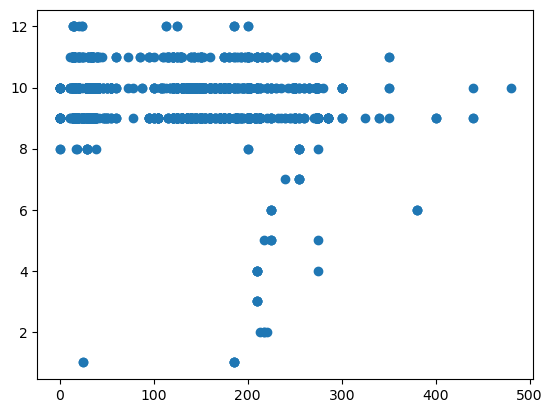

In [10]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

¿La gráfica es útil? ¿Hay algo acerca de ésta que te sorprenda?

No es particularmente útil ya que todo lo que hace es mostrar tus datos como puntos dispersos en un mes dado.

#### Hacerlo útil

Para obtener gráficas para mostrar datos útiles, se necesita agrupar los datos de alguna forma. Probemos creando un gráfico donde el eje y muestre los meses y los datos demuestren la distribución de los datos.

1. Agrega una celda para crear una gráfica de barras agrupadas:

Text(0, 0.5, 'Pumpkin Price')

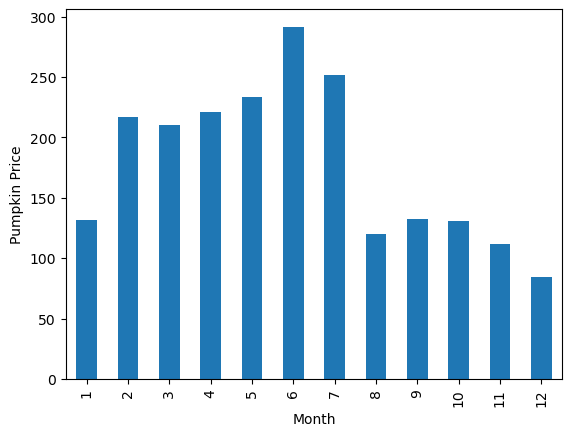

In [11]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

¡Esta es una visualización de datos más útil! Parece indicar un precio más alto en las calabazas que ocurre en los meses Septiembre y Octubre con diferencia a los meses posteriores. ¿Cumple esto con las expectativas? ¿por qué sí o por qué no?